In [1]:
from newick import loads
import newick
from DNASkittleUtils.DDVUtils import pp

# Cafe

Families for study were determined in "FunctionsForFamilies.ipynb" under the name `wgd_study_ints` based on the following criteria:
#### Select families for study in Repeated Loss Tree mode
* Must be in every Oleaceae species
* Must be in > 1 copy in >25% of the species
* Not present in more than two copies in any species
* Must have a std dev > 0, meaning variation is present
* Ks indicates copies were made in the most recent WGD

In [3]:
import csv

all_trees = {}
with open(r"CAFE-4.2\data\homeologs_only\reports\oleaceae_homeologs_one_rate.cafe", 'r') as csvfile:
    lines = csvfile.readlines()[10:]
    for nLines, row in enumerate(lines):
        row = row.split('\t')
        all_trees[int(row[0])] = row[1]
len(all_trees)

8484

In [4]:
all_trees[10000013]

'((((((((((FRAX30_2:2,FRAX32_1:2)_1:1,FRAX28_1:3)_1:2,FRAX12_0:5)_1:4,(FRAX07_2:8,FRAX29_2:8)_2:1)_2:4,FRAX08_1:13)_2:1,(((((FRAX01_1:2,FRAX16_0:2)_1:4,FRAX15_0:6)_1:2,FRAX00_1:8)_1:2,(FRAX06_2:9,FRAX23_0:9)_2:1)_2:3,FRAX25_1:13)_2:1)_2:3,FRAX21_1:17)_2:2,(((FRAX19_2:8,FRAX20_1:8)_2:2,((FRAX11_2:5,FRAX27_1:5)_2:4,FRAX04_1:9)_2:1)_2:1,(((((FRAX03_1:1,FRAX09_1:1)_1:1,FRAX13_1:2)_1:2,(FRAX26_0:2,FRAX14_0:2)_0:2)_1:3,FRAX05_1:7)_1:2,FRAX33_2:9)_2:2)_2:8)_2:15,FRAX31_1:34)_2:2,Oeuropea_1:36)_2:36'

In [5]:
list(all_trees.values())[:3]

['((((((((((FRAX30_1:2,FRAX32_1:2)_1:1,FRAX28_1:3)_1:2,FRAX12_1:5)_1:4,(FRAX07_2:8,FRAX29_1:8)_1:1)_1:4,FRAX08_1:13)_1:1,(((((FRAX01_1:2,FRAX16_1:2)_1:4,FRAX15_1:6)_1:2,FRAX00_0:8)_1:2,(FRAX06_1:9,FRAX23_1:9)_1:1)_1:3,FRAX25_1:13)_1:1)_1:3,FRAX21_1:17)_1:2,(((FRAX19_1:8,FRAX20_1:8)_1:2,((FRAX11_1:5,FRAX27_1:5)_1:4,FRAX04_0:9)_1:1)_1:1,(((((FRAX03_1:1,FRAX09_1:1)_1:1,FRAX13_1:2)_1:2,(FRAX26_1:2,FRAX14_1:2)_1:2)_1:3,FRAX05_1:7)_1:2,FRAX33_1:9)_1:2)_1:8)_1:15,FRAX31_0:34)_1:2,Oeuropea_1:36)_1:36',
 '((((((((((FRAX30_1:2,FRAX32_1:2)_1:1,FRAX28_1:3)_1:2,FRAX12_1:5)_1:4,(FRAX07_1:8,FRAX29_1:8)_1:1)_1:4,FRAX08_1:13)_1:1,(((((FRAX01_1:2,FRAX16_1:2)_1:4,FRAX15_1:6)_1:2,FRAX00_1:8)_1:2,(FRAX06_1:9,FRAX23_1:9)_1:1)_1:3,FRAX25_1:13)_1:1)_1:3,FRAX21_1:17)_1:2,(((FRAX19_1:8,FRAX20_1:8)_1:2,((FRAX11_1:5,FRAX27_1:5)_1:4,FRAX04_1:9)_1:1)_1:1,(((((FRAX03_1:1,FRAX09_1:1)_1:1,FRAX13_1:2)_1:2,(FRAX26_1:2,FRAX14_1:2)_1:2)_1:3,FRAX05_1:7)_1:2,FRAX33_1:9)_1:2)_1:8)_1:15,FRAX31_1:34)_1:2,Oeuropea_1:36)_1:36',


In [6]:
all_homeologs = list(all_trees.keys())

In [7]:
ordered_names = loads('((((((((((FRAX30:2,FRAX32:2)<1>:1,FRAX28:3)<3>:2,FRAX12:5)<5>:4,(FRAX07:8,FRAX29:8)<9>:1)<7>:4,FRAX08:13)<11>:1,(((((FRAX01:2,FRAX16:2)<15>:4,FRAX15:6)<17>:2,FRAX00:8)<19>:2,(FRAX06:9,FRAX23:9)<23>:1)<21>:3,FRAX25:13)<25>:1)<13>:3,FRAX21:17)<27>:2,(((FRAX19:8,FRAX20:8)<31>:2,((FRAX11:5,FRAX27:5)<35>:4,FRAX04:9)<37>:1)<33>:1,(((((FRAX03:1,FRAX09:1)<41>:1,FRAX13:2)<43>:2,(FRAX26:2,FRAX14:2)<47>:2)<45>:3,FRAX05:7)<49>:2,FRAX33:9)<51>:2)<39>:8)<29>:15,FRAX31:34)<53>:2,Oeuropea:36)<55>:36')[0]
def create_ordered_nodes(verbose=False):
    ordered_nodes = []
    for node in ordered_names.walk(mode="preorder"):
        if verbose:
            print(node.name, node.length)
        ordered_nodes.append({'name': node.name, 'length':node.length, 'losses': 0, 'gains': 0, 'avg#': 0})
    return ordered_nodes
_ = create_ordered_nodes(False)

In [11]:
def extract_count(name):
    if isinstance(name, newick.Node):
        name = name.name
    return int(name.split('_')[-1])

for node in loads(all_trees[10000013])[0].walk(mode="preorder"):
    print(node.name, extract_count(node.name))

_2 2
_2 2
_2 2
_2 2
_2 2
_2 2
_2 2
_1 1
_1 1
_1 1
FRAX30_2 2
FRAX32_1 1
FRAX28_1 1
FRAX12_0 0
_2 2
FRAX07_2 2
FRAX29_2 2
FRAX08_1 1
_2 2
_2 2
_1 1
_1 1
_1 1
FRAX01_1 1
FRAX16_0 0
FRAX15_0 0
FRAX00_1 1
_2 2
FRAX06_2 2
FRAX23_0 0
FRAX25_1 1
FRAX21_1 1
_2 2
_2 2
_2 2
FRAX19_2 2
FRAX20_1 1
_2 2
_2 2
FRAX11_2 2
FRAX27_1 1
FRAX04_1 1
_2 2
_1 1
_1 1
_1 1
_1 1
FRAX03_1 1
FRAX09_1 1
FRAX13_1 1
_0 0
FRAX26_0 0
FRAX14_0 0
FRAX05_1 1
FRAX33_2 2
FRAX31_1 1
Oeuropea_1 1


In [13]:
def populate_history_histogram(study_ints):
    ordered_nodes = create_ordered_nodes()
    genes_lost = {node['name']:set() for node in ordered_nodes}
    for fam_id in study_ints:
        newick_str = all_trees[fam_id]
        tree = loads(newick_str)[0]
        for index, node in enumerate(tree.walk(mode="preorder")):
            count = extract_count(node)
            tail = ''
            ordered_nodes[index]['avg#'] += count
            if node.ancestor:
                parent_count = extract_count(node.ancestor.name)
                if count < parent_count:
                    tail = ("loss")
                    ordered_nodes[index]['losses'] += 1 #parent_count - count
                    place_name = node.name.split('_')[0]
                    if place_name:
                        genes_lost[place_name].add(fam_id)  # record gene family
                elif count > parent_count:
                    tail = ("gain")
                    ordered_nodes[index]['gains'] += 1 #count - parent_count 
#             print(node.name, count, tail)
    for result in ordered_nodes:  # divide sum by length to get mean
        result['avg#'] /= len(study_ints)
    return ordered_nodes, genes_lost
ordered_nodes, genes_lost = populate_history_histogram(all_homeologs)
ordered_nodes

[{'avg#': 1.2597831211692598,
  'gains': 0,
  'length': 36.0,
  'losses': 0,
  'name': '<55>'},
 {'avg#': 1.2595473833097595,
  'gains': 0,
  'length': 2.0,
  'losses': 2,
  'name': '<53>'},
 {'avg#': 1.0658887317303158,
  'gains': 1,
  'length': 15.0,
  'losses': 1532,
  'name': '<29>'},
 {'avg#': 1.026049033474776,
  'gains': 0,
  'length': 2.0,
  'losses': 338,
  'name': '<27>'},
 {'avg#': 1.0166195190947667,
  'gains': 3,
  'length': 3.0,
  'losses': 83,
  'name': '<13>'},
 {'avg#': 0.9658180103724658,
  'gains': 9,
  'length': 1.0,
  'losses': 440,
  'name': '<11>'},
 {'avg#': 0.9565063649222065,
  'gains': 39,
  'length': 4.0,
  'losses': 119,
  'name': '<7>'},
 {'avg#': 0.9151343705799151,
  'gains': 29,
  'length': 4.0,
  'losses': 378,
  'name': '<5>'},
 {'avg#': 0.8958038661008958,
  'gains': 30,
  'length': 2.0,
  'losses': 195,
  'name': '<3>'},
 {'avg#': 0.8539603960396039,
  'gains': 23,
  'length': 1.0,
  'losses': 373,
  'name': '<1>'},
 {'avg#': 0.7755775577557755,
  '

In [14]:
all_ordered_nodes, genes_lost = populate_history_histogram(list(all_trees.keys()))
all_ordered_nodes

[{'avg#': 1.2597831211692598,
  'gains': 0,
  'length': 36.0,
  'losses': 0,
  'name': '<55>'},
 {'avg#': 1.2595473833097595,
  'gains': 0,
  'length': 2.0,
  'losses': 2,
  'name': '<53>'},
 {'avg#': 1.0658887317303158,
  'gains': 1,
  'length': 15.0,
  'losses': 1532,
  'name': '<29>'},
 {'avg#': 1.026049033474776,
  'gains': 0,
  'length': 2.0,
  'losses': 338,
  'name': '<27>'},
 {'avg#': 1.0166195190947667,
  'gains': 3,
  'length': 3.0,
  'losses': 83,
  'name': '<13>'},
 {'avg#': 0.9658180103724658,
  'gains': 9,
  'length': 1.0,
  'losses': 440,
  'name': '<11>'},
 {'avg#': 0.9565063649222065,
  'gains': 39,
  'length': 4.0,
  'losses': 119,
  'name': '<7>'},
 {'avg#': 0.9151343705799151,
  'gains': 29,
  'length': 4.0,
  'losses': 378,
  'name': '<5>'},
 {'avg#': 0.8958038661008958,
  'gains': 30,
  'length': 2.0,
  'losses': 195,
  'name': '<3>'},
 {'avg#': 0.8539603960396039,
  'gains': 23,
  'length': 1.0,
  'losses': 373,
  'name': '<1>'},
 {'avg#': 0.7755775577557755,
  '

# Histogram of change per time interval

In [17]:
def ancestors_length(node):
    ancestors = []
    while node.ancestor:
        node = node.ancestor
        ancestors.append(node.length)
    return ancestors

def populate_change_histogram(results_per_node, blacklist_index):
    losses_per_interval = [0] * 79  # contain sums of changes
    gains_per_interval = [0] * 79  # contain sums of changes
    branch_occupancy = [0] * 79  # number of branches at that interval for normalization


    for node_i, node in enumerate(ordered_names.walk(mode="preorder")):
        if node_i not in blacklist_index:
            ancestor_sum_length = int(sum(ancestors_length(node)))
            my_end = ancestor_sum_length + int(node.length)
            for year in range(ancestor_sum_length, my_end):
                losses_per_interval[year] += results_per_node[node_i]['losses'] / node.length
                gains_per_interval[year] += results_per_node[node_i]['gains'] / node.length
                branch_occupancy[year] += 1
    print(gains_per_interval)
    print(branch_occupancy)
    normalized_losses = [losses / max(1,branches) for (losses, branches) in zip(losses_per_interval, branch_occupancy) ]
    normalized_gains = [gains / max(1,branches) for (gains, branches) in zip(gains_per_interval, branch_occupancy) ]
    print(normalized_gains)
    return normalized_losses, normalized_gains

In [18]:
%%html
<img src="CAFE-4.2/data/homeologs_only/reports/tree_nodes.png">

In [19]:
normalized_losses, normalized_gains = populate_change_histogram(ordered_nodes, [])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.2777777777777777, 2.2777777777777777, 2.4326797385620913, 2.4326797385620913, 2.4326797385620913, 2.4326797385620913, 2.4326797385620913, 2.4326797385620913, 2.4326797385620913, 2.4326797385620913, 2.4326797385620913, 2.4326797385620913, 2.4326797385620913, 2.4326797385620913, 2.4326797385620913, 2.4326797385620913, 2.4326797385620913, 3.116013071895425, 3.116013071895425, 9.93954248366013, 9.93954248366013, 9.93954248366013, 21.939542483660134, 42.99723479135243, 42.99723479135243, 52.74723479135243, 85.24723479135244, 123.30279034690798, 217.55279034690798, 231.14802844214606, 231.81469510881274, 292.16469510881274, 301.99802844214605, 347.66469510881274, 618.6646951088129, 868.6646951088129, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

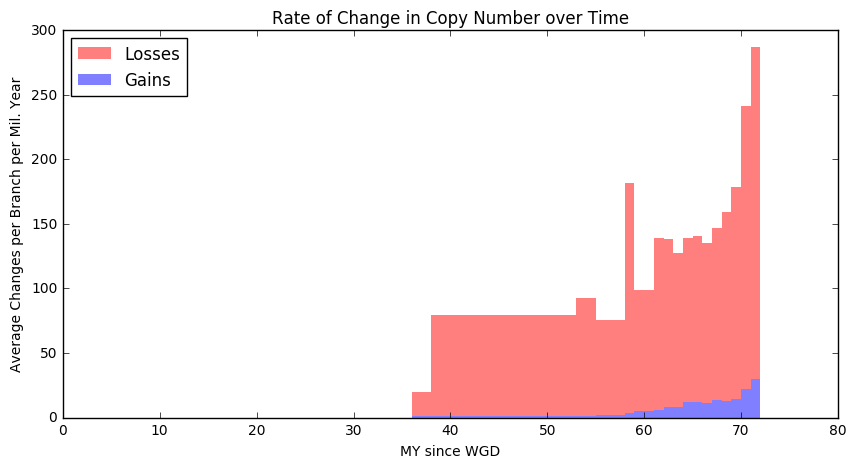

In [20]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def plot_time_histogram(normalized_losses, normalized_gains):
    # plot time_intervals,  plot gains in different colors
    fig, ax = plt.subplots(figsize=(10,5), dpi=100)
    xs = np.arange(0, len(normalized_losses))
    bar_width = 1
    ax.bar(xs, normalized_losses, bar_width,
                    alpha=.5, color='r', linewidth=0,
                    label='Losses')
    ax.bar(xs, normalized_gains, bar_width,
                    alpha=1., color='#7F7FFF', linewidth=0,
                    label='Gains')
    ax.set_xlabel('MY since WGD')
    ax.set_ylabel('Average Changes per Branch per Mil. Year')
    ax.set_title('Rate of Change in Copy Number over Time')
    # ax.set_xticks(index + bar_width / 2)
    # ax.set_xticklabels(('A', 'B', 'C', 'D', 'E'))
    ax.legend(loc='upper left')
    # fig.tight_layout()
plot_time_histogram(normalized_losses, normalized_gains)  

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.2777777777777777, 2.2777777777777777, 2.4326797385620913, 2.4326797385620913, 2.4326797385620913, 2.4326797385620913, 2.4326797385620913, 2.4326797385620913, 2.4326797385620913, 2.4326797385620913, 2.4326797385620913, 2.4326797385620913, 2.4326797385620913, 2.4326797385620913, 2.4326797385620913, 2.4326797385620913, 2.4326797385620913, 3.116013071895425, 3.116013071895425, 9.93954248366013, 9.93954248366013, 9.93954248366013, 21.939542483660134, 42.99723479135243, 42.99723479135243, 52.74723479135243, 85.24723479135244, 123.30279034690798, 217.55279034690798, 231.14802844214606, 231.81469510881274, 292.16469510881274, 301.99802844214605, 347.66469510881274, 618.6646951088129, 868.6646951088129, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

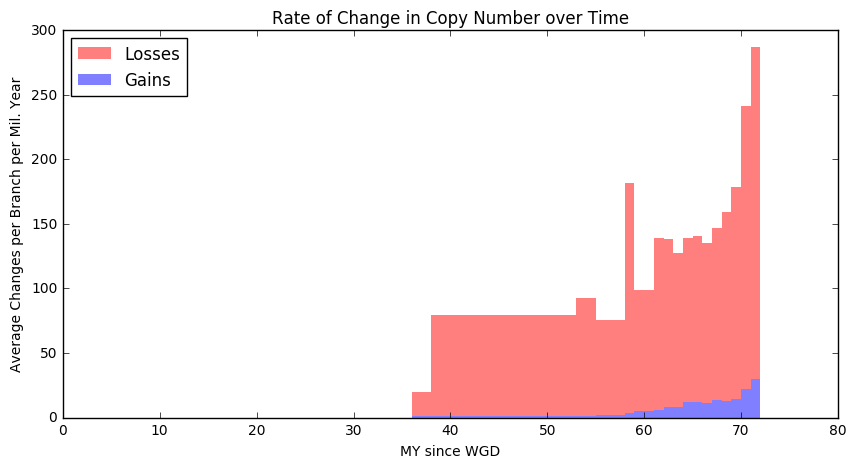

In [21]:
frax_normalized_losses, frax_normalized_gains = populate_change_histogram(ordered_nodes, [])
plot_time_histogram(frax_normalized_losses, frax_normalized_gains)

**Conclusion: Supports lag-time model though could be from incomplete assembly and annotation.**

### Prefiltering for genes that are copy 2 at root

In [24]:
ordered_nodes[0]

{'avg#': 1.2597831211692598,
 'gains': 0,
 'length': 36.0,
 'losses': 0,
 'name': '<55>'}

In [25]:
def get_count_at_root(fam_id, ordered_node_index=0):
    newick_str = all_trees[fam_id]
    tree = loads(newick_str)[0]
    for index, node in enumerate(tree.walk(mode="preorder")):
        if index == ordered_node_index:
            count = extract_count(node)
            return count

In [28]:
    
filtered_wgd_study_ints = [fam for fam in all_homeologs if get_count_at_root(fam) == 2]
assert all([get_count_at_root(fam)==2 for fam in filtered_wgd_study_ints])

print(pp(len(filtered_wgd_study_ints) / len(all_homeologs)), 'preserved')

20.320603% preserved


In [29]:
def i_hist(values):
    bins = [0] * (max(values) +1)
    for v in values:
        bins[v] += 1
    return bins

copies = [ get_count_at_root(fam) for fam in all_homeologs]
print(i_hist(copies))

[0, 6556, 1724, 161, 32, 6, 0, 2, 1, 0, 1, 1]


In [30]:
def pretty_hist(title, raw_values, x_title="Number of events", y_title="Number of Families"):
    import pandas
    df = pandas.Series(raw_values)#, columns=['Family ID', 'Copies'])
    bins = max(raw_values)
    f = df.hist(bins=bins, figsize=(10,5), facecolor='#31a354', edgecolor='#31a354')#dpi=300)
    f.grid(False)
    f.set_xticks([i for i in range(bins) if i %2 == 0])
    f.set_title(title)
    f.set_xlabel(x_title)
    f.set_ylabel(y_title)

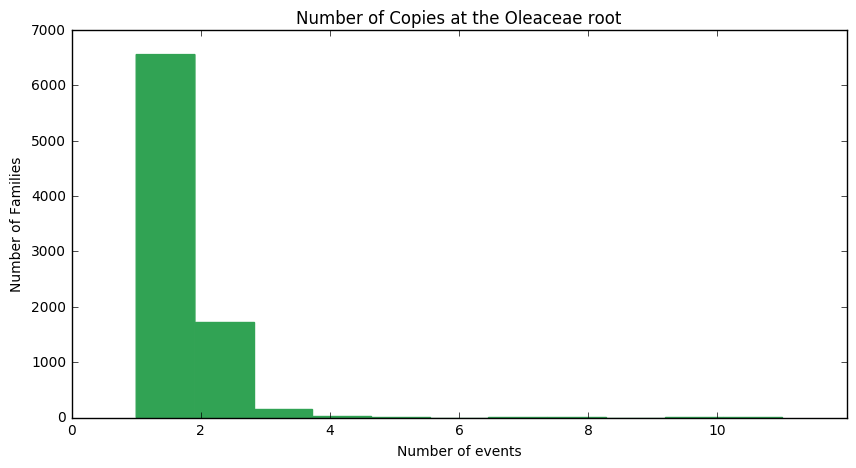

In [31]:
pretty_hist('Number of Copies at the Oleaceae root', [c for c in copies if c < 21])

## Patterns of Repeated Loss
All families in the study have at least one loss event present which could affect one or more species depending on the position in the tree.  If the species with copy number 1 are all monophyletic, then only one event is necessary.  If they are polyphyletic, then multiple events are necessary.  But what is our null distribution?  What is a chance scattering uniformly across time?  Is it similar to our history histogram?

In [34]:
def collect_loss_events_per_family(study_ints, blacklist_index):
    ordered_nodes = create_ordered_nodes()
    loss_events_per_family = {'pad':0}
    for fam_id in study_ints:
        current_family_loss_events = 0
        species_total = 0
        newick_str = all_trees[fam_id]
        tree = loads(newick_str)[0]
        for index, node in enumerate(tree.walk(mode="preorder")):
            count = extract_count(node)
            if node.ancestor and index not in blacklist_index:
                if not node.name.startswith('_'):
                    species_total += count
                parent_count = extract_count(node.ancestor.name)
                if count < parent_count:  # "loss"
                    current_family_loss_events += 1
                elif count > parent_count:  # gain
                    pass
        loss_events_per_family[fam_id] = current_family_loss_events
    pretty_hist("Repeated Loss in the Same Gene Family", list(loss_events_per_family.values()))
    return loss_events_per_family

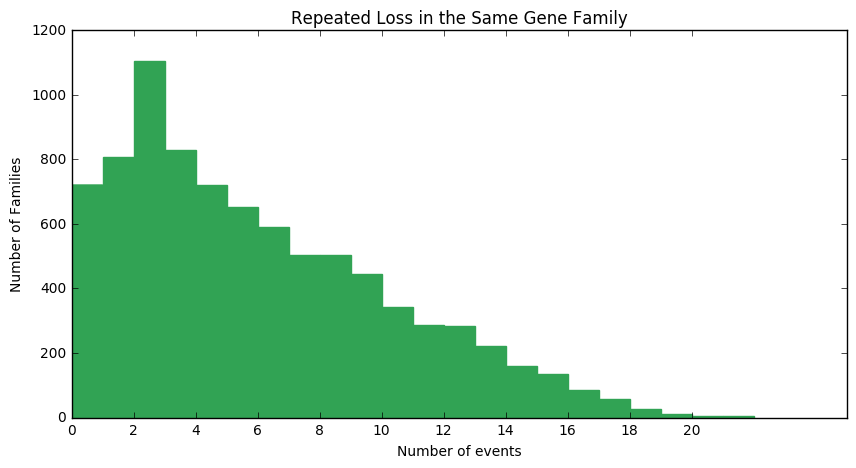

In [36]:
all_loss_events = collect_loss_events_per_family(list(all_trees.keys()), [])

**One Single distribution! down from a mixture**

* families of different size, big families can have more losses
* Annotation errors
* Different selective constraints

In [37]:
len(filtered_wgd_study_ints)

1724

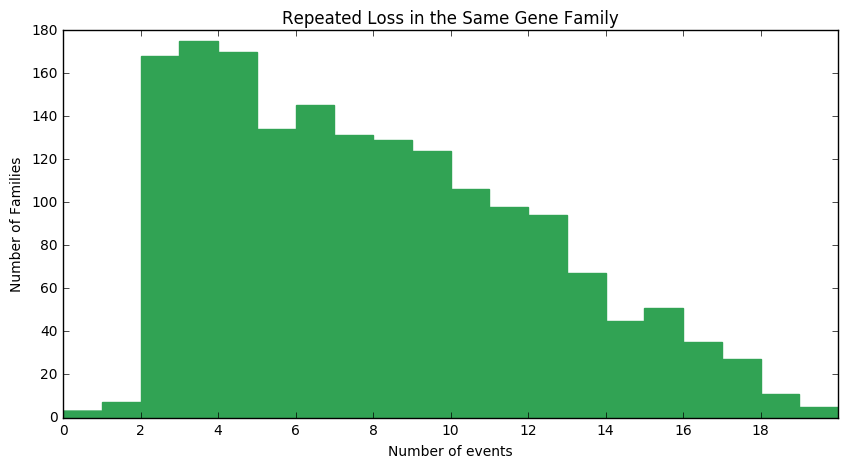

In [39]:
wgd_study_jsg_losses = collect_loss_events_per_family(filtered_wgd_study_ints, [])

**Conclusion**: The additional filtering for copy number 2 at the root can be safely ignored.  It's less objective of a constraint than using the gene trees, which I've already done.

## Categorical Histograms combined

In [43]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def categorical_histogram(title, datasets, normalize=False):
    # plot time_intervals,  plot gains in different colors
    fig, ax = plt.subplots(figsize=(10,5), dpi=600, facecolor='white')
    hist_series = [[label, i_hist(values)] for label, values in datasets.items()]
    longest = max([len(hist[1]) for hist in hist_series])  
    for i, pair in enumerate(hist_series):
        hist_series[i][1] = (hist_series[i][1] + [0] * longest)[:longest] # zero padding
    xs = np.arange(0, longest)  # set x axis
    bar_width = 1
    cmap = plt.get_cmap("Dark2")
    colors = cmap(np.arange(len(datasets))*50)

    height_sorted = sorted(hist_series, key=lambda pair: -max(pair[1]))
    tops = [max(pair[1]) for pair in height_sorted]
    for i, pair in enumerate(height_sorted):
        label, bars = pair
        adjusted_bars = [b*(tops[0] / tops[i]) for b in bars]
        if normalize:
            bars = adjusted_bars
        ax.bar(xs, bars, bar_width,
                    alpha=.4, color=colors[i], linewidth=0,
                    label=label)
        
    ax.set_xlabel('Independent Events')
    ax.set_ylabel('Count #')
    ax.set_title(title)
    # ax.set_xticks(index + bar_width / 2)
    # ax.set_xticklabels(('A', 'B', 'C', 'D', 'E'))
    ax.legend(loc='upper right')
    # fig.tight_layout()
    

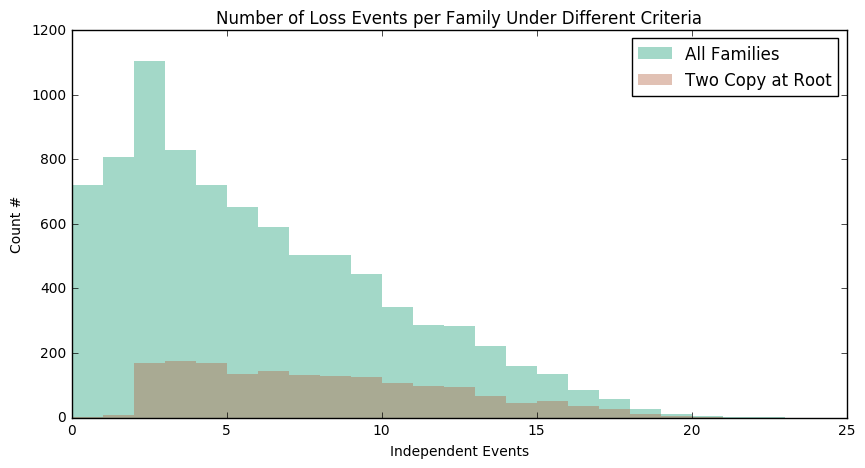

In [44]:
categorical_histogram('Number of Loss Events per Family Under Different Criteria',
    {'All Families': all_loss_events.values(),
     'Two Copy at Root': wgd_study_jsg_losses.values(),
    })

In [45]:
pp(len(all_trees))

'8,484'

## Intersecting Sets of Polyphyletic Gene Family losses

In [46]:
from scipy.stats import hypergeom

def simple_overlap_prob(A, B, all_possible, verbose=True):
    intersect = len(set(A).intersection(set(B)))
    if verbose:
        print(pp(len(A)), "overlapping with", pp(len(B)), "by", pp(intersect),"in a space of size", pp(len(all_possible)))
    return min(1, hypergeom.sf(intersect-1, len(all_possible), len(A), len(B)))  # pval assuming even distribution

In [48]:
len(all_homeologs)

8484

In [49]:
species_names = [node['name'] for node in ordered_nodes if not node['name'].startswith('<')]  # 
from statistics import mean, median
# All pair wise combintations once
for x in range(len(species_names)):
    for y in range(x+1, len(species_names)):
        intersect = genes_lost[species_names[x]].intersection(genes_lost[species_names[y]])
        print(species_names[x], species_names[y], len(intersect), end=': ')
        print(simple_overlap_prob(genes_lost[species_names[x]], genes_lost[species_names[y]], all_homeologs, verbose=False)) #TODO probability

FRAX30 FRAX32 0: 1
FRAX30 FRAX28 274: 3.1364980229143334e-73
FRAX30 FRAX12 305: 1.8023576073635696e-49
FRAX30 FRAX07 196: 1.1429522679045343e-28
FRAX30 FRAX29 301: 5.720286936336575e-38
FRAX30 FRAX08 330: 4.940262746677946e-36
FRAX30 FRAX01 78: 0.002162424791929459
FRAX30 FRAX16 171: 2.3332063718828556e-09
FRAX30 FRAX15 173: 2.467103861222619e-07
FRAX30 FRAX00 109: 5.92921186512647e-07
FRAX30 FRAX06 144: 1.9563839608683213e-06
FRAX30 FRAX23 237: 2.753241797733675e-09
FRAX30 FRAX25 290: 1.562190559628186e-13
FRAX30 FRAX21 324: 1.150188265216043e-16
FRAX30 FRAX19 79: 4.8114688698860196e-05
FRAX30 FRAX20 181: 4.5992800827466376e-05
FRAX30 FRAX11 42: 0.12082455557279666
FRAX30 FRAX27 105: 0.0004973432348972069
FRAX30 FRAX04 162: 1.1173102849297687e-05
FRAX30 FRAX03 153: 0.00022981897121383945
FRAX30 FRAX09 49: 0.03569661395857489
FRAX30 FRAX13 159: 0.0010209397126936662
FRAX30 FRAX26 57: 0.015251931358944808
FRAX30 FRAX14 123: 0.0006817555120483923
FRAX30 FRAX05 196: 6.751963713896424e-08


** Conclusion: Probabilities of overlapping sets are almost always highly significant!  What's the mean overlaps %?**

In [53]:
# All pair wise combintations once
overlap_percentages = []
for x in range(len(species_names)):
    for y in range(x+1, len(species_names)):
        intersect = genes_lost[species_names[x]].intersection(genes_lost[species_names[y]])
        print(species_names[x], species_names[y], len(intersect), end=': ')
        p1 = len(intersect) / len(genes_lost[species_names[x]])
        p2 = len(intersect) / len(genes_lost[species_names[y]])
        overlap_percentages.append(p1); overlap_percentages.append(p2)
        print(pp(p1), pp(p2))
print("Average")
pp(mean(overlap_percentages))

FRAX30 FRAX32 0: 0.0 0.0
FRAX30 FRAX28 274: 36.631016% 26.020893%
FRAX30 FRAX12 305: 40.775401% 19.206549%
FRAX30 FRAX07 196: 26.203209% 19.029126%
FRAX30 FRAX29 301: 40.240642% 17.180365%
FRAX30 FRAX08 330: 44.117647% 16.042781%
FRAX30 FRAX01 78: 10.427807% 12.074303%
FRAX30 FRAX16 171: 22.860963% 13.359375%
FRAX30 FRAX15 173: 23.128342% 12.509038%
FRAX30 FRAX00 109: 14.572193% 13.850064%
FRAX30 FRAX06 144: 19.251337% 12.631579%
FRAX30 FRAX23 237: 31.684492% 12.260735%
FRAX30 FRAX25 290: 38.770053% 12.647187%
FRAX30 FRAX21 324: 43.315508% 12.836767%
FRAX30 FRAX19 79: 10.561497% 13.597246%
FRAX30 FRAX20 181: 24.197861% 11.433986%
FRAX30 FRAX11 42: 5.614973% 10.579345%
FRAX30 FRAX27 105: 14.037433% 11.972634%
FRAX30 FRAX04 162: 21.657754% 11.955720%
FRAX30 FRAX03 153: 20.454545% 11.417910%
FRAX30 FRAX09 49: 6.550802% 11.395349%
FRAX30 FRAX13 159: 21.256684% 10.995851%
FRAX30 FRAX26 57: 7.620321% 11.704312%
FRAX30 FRAX14 123: 16.443850% 11.549296%
FRAX30 FRAX05 196: 26.203209% 12.365931%

'23.331720%'

So the average overlap is 23% of all losses in that species.  Is that higher than the total families lost in that species?

In [77]:
mean([len(genes_lost[species]) for species in species_names])

1316.7931034482758

In [76]:
# These numbers were pulled in from sums of oleaceae_homeologs_one_rate_anc.csv
csv_anc_totals = [6209,8173,6669,6069,8327,6236,8118,8705,7581,8126,6089,7682,7886,6660,6215,6823,9230,6878,5879,6422,7228,6202,6943,8194,8531,7413,7214,8625,6268,8085,7419,7870,7111,7939,6574,8132,7269,6541,7395,6505,6059,8015,7600,6580,10686,6868,8216,6571,7245,8115,7381,7683,9043,6655,7069,7764]
csv_anc_names = 'FRAX08	<33>	FRAX05	FRAX25	<25>	FRAX14	<21>	<27>	<31>	<23>	FRAX15	<35>	<37>	FRAX32	FRAX21	FRAX33	Oeuropea	FRAX26	FRAX16	FRAX03	FRAX07	FRAX23	FRAX31	<11>	<39>	FRAX09	FRAX19	<13>	FRAX12	<49>	<17>	<43>	<15>	<19>	FRAX29	<9>	<47>	FRAX01	FRAX00	FRAX13	FRAX20	<45>	<3>	FRAX30	<53>	FRAX27	<51>	FRAX04	<1>	<7>	FRAX11	<41>	<29>	FRAX28	FRAX06	<5>'.split('\t')
species_totals = dict(zip(csv_anc_names, csv_anc_totals))
species_totals['FRAX08']

6209

In [66]:
from statistics import mean, median
mean([species_totals[s] for s in species_names])

6718.793103448276

In [70]:
print("Average percentage of genes lost", pp(1316.7931 / (6718.7931 + 1316.7931)))

Average percentage of genes lost 16.387020%


In [72]:
overlap_percentages = []
for x in range(len(species_names)):
    for y in range(x+1, len(species_names)):
        intersect = genes_lost[species_names[x]].intersection(genes_lost[species_names[y]])
        print(species_names[x], species_names[y], len(intersect), end=': ')
        p1 = len(intersect) / species_totals[species_names[x]]
        p2 = len(intersect) / species_totals[species_names[y]]
        overlap_percentages.append(p1); overlap_percentages.append(p2)
        print(pp(p1), pp(p2))
print("Average")
pp(sum(overlap_percentages) / len(overlap_percentages))

FRAX30 FRAX32 0: 0.0 0.0
FRAX30 FRAX28 274: 4.164134% 4.117205%
FRAX30 FRAX12 305: 4.635258% 4.865986%
FRAX30 FRAX07 196: 2.978723% 2.711677%
FRAX30 FRAX29 301: 4.574468% 4.578643%
FRAX30 FRAX08 330: 5.015198% 5.314866%
FRAX30 FRAX01 78: 1.185410% 1.192478%
FRAX30 FRAX16 171: 2.598784% 2.908658%
FRAX30 FRAX15 173: 2.629179% 2.841189%
FRAX30 FRAX00 109: 1.656535% 1.473969%
FRAX30 FRAX06 144: 2.188450% 2.037063%
FRAX30 FRAX23 237: 3.601824% 3.821348%
FRAX30 FRAX25 290: 4.407295% 4.778382%
FRAX30 FRAX21 324: 4.924012% 5.213194%
FRAX30 FRAX19 79: 1.200608% 1.095093%
FRAX30 FRAX20 181: 2.750760% 2.987292%
FRAX30 FRAX11 42: 0.638298% 0.569029%
FRAX30 FRAX27 105: 1.595745% 1.528829%
FRAX30 FRAX04 162: 2.462006% 2.465378%
FRAX30 FRAX03 153: 2.325228% 2.382435%
FRAX30 FRAX09 49: 0.744681% 0.661001%
FRAX30 FRAX13 159: 2.416413% 2.444274%
FRAX30 FRAX26 57: 0.866261% 0.828729%
FRAX30 FRAX14 123: 1.869301% 1.972418%
FRAX30 FRAX05 196: 2.978723% 2.938971%
FRAX30 FRAX33 174: 2.644377% 2.550198%
FRAX3

'4.603341%'

In [75]:
print("I would expect overlap of ", pp(.1638 * .1638), "to be not significant")

I would expect overlap of  2.683044% to be not significant


Previous studies in order:  
FRAX00 FRAX03 112: **0.906**7841591878111  
FRAX00 FRAX03 112: 14.231258% 8.358209%  
FRAX00 FRAX03 112: 1.514537% 1.744005%   
  
**Conclusion:** Negative control is behaving as it should.

FRAX00 Oeuropea 263: 7.022379897503273**e-36**  
FRAX00 Oeuropea 263: 33.418043% 19.030391%  
FRAX00 Oeuropea 263: 3.556457% 2.849404%  

FRAX06 FRAX03 192: **0.15**890200229390933  
FRAX06 FRAX03 192: 16.842105% 14.328358%  
FRAX06 FRAX03 192: 2.716084% 2.989723%  
**Conclusion:** An overlap becomes statistically signficant very quickly after crossing the ~2.6% threshold.

----------------------

# Null Model from Simulation Comparison

## Null model for deletion events
Assume a uniform probability of having a deletion at any time point per branch.  Veto deletions that would drop the number to 0 in FRAX00.  Keep creating deletions until the average copy# per extant species matches for that family.

Construct one path for each species.  Path is a set of nodes.  Randomly pick species.  Randomly pick node weighted by node length.  Add a loss event, repeat until average is acheived.  Graph ensuing histogram

```
constraints = FRAX00 must have > 0,  no species has less than 0
n_deletions = 2 * 6 - sum(
for family_tree in all_trees:
    for path in species_paths:
        
        while current_count > terminal_count[species]:
            branch = random.choice(path, weights)
            branch.count -= 1
            for d in branch.descendants:
                branch.count -= 1
                if d.count < actual_count:
                    veto deletion
                #this is getting really complicated
```